<a href="https://colab.research.google.com/github/Naaastenka/Project1/blob/main/Hometask/Task2_dmrf_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/4vel/python-intro/blob/main/Hometask/Task2_dmrf_visual.ipynb)

# Задание

* Используя данные об объектах недвижимости на сайте "наш.дом.рф" или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
#### Идеи для мини-исследования
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
from pylab import rcParams

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
url='https://raw.githubusercontent.com/Naaastenka/Project1/main/Hometask/data.csv'

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
dom = pd.read_csv(url, parse_dates=True)

In [7]:
dom.head(3)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Абсолют Недвижимость,developer,https://www.cian.ru/sale/flat/304065659/,Москва,sale,flat,4,17,2,49.8,53567000,Хамовники,NaN,NaN,Воробьёвы горы,Коллекция Лужники ЖК
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/302081797/,Москва,sale,flat,2,10,2,69.4,85000000,Тверской,Палиха,4,Менделеевская,Клубный дом Maison Rouge
2,Акрополь,real_estate_agent,https://www.cian.ru/sale/flat/300605973/,Москва,sale,flat,15,16,1,34.3,9500000,NaN,Василия Ощепкова,2,Коммунарка,Москвичка


In [ ]:
#Посмотрим 2 графика, которые предлагает Colab как рекомендацию
#График 1

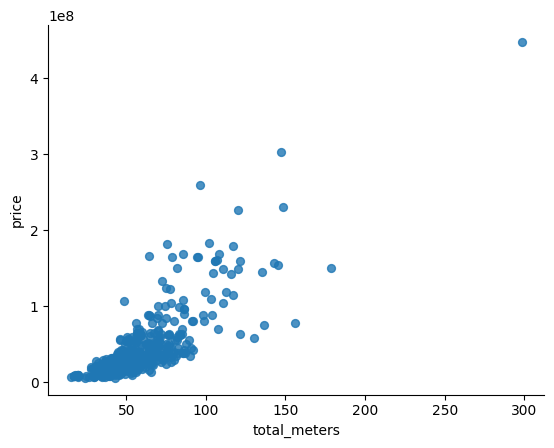

In [9]:
# @title total_meters vs price

from matplotlib import pyplot as plt
dom.plot(kind='scatter', x='total_meters', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#На графике видно, что маленькие площади квартир продаются по низким ценам, и чем больше площадь, тем выше цена, что логичнно

In [ ]:
#График 2

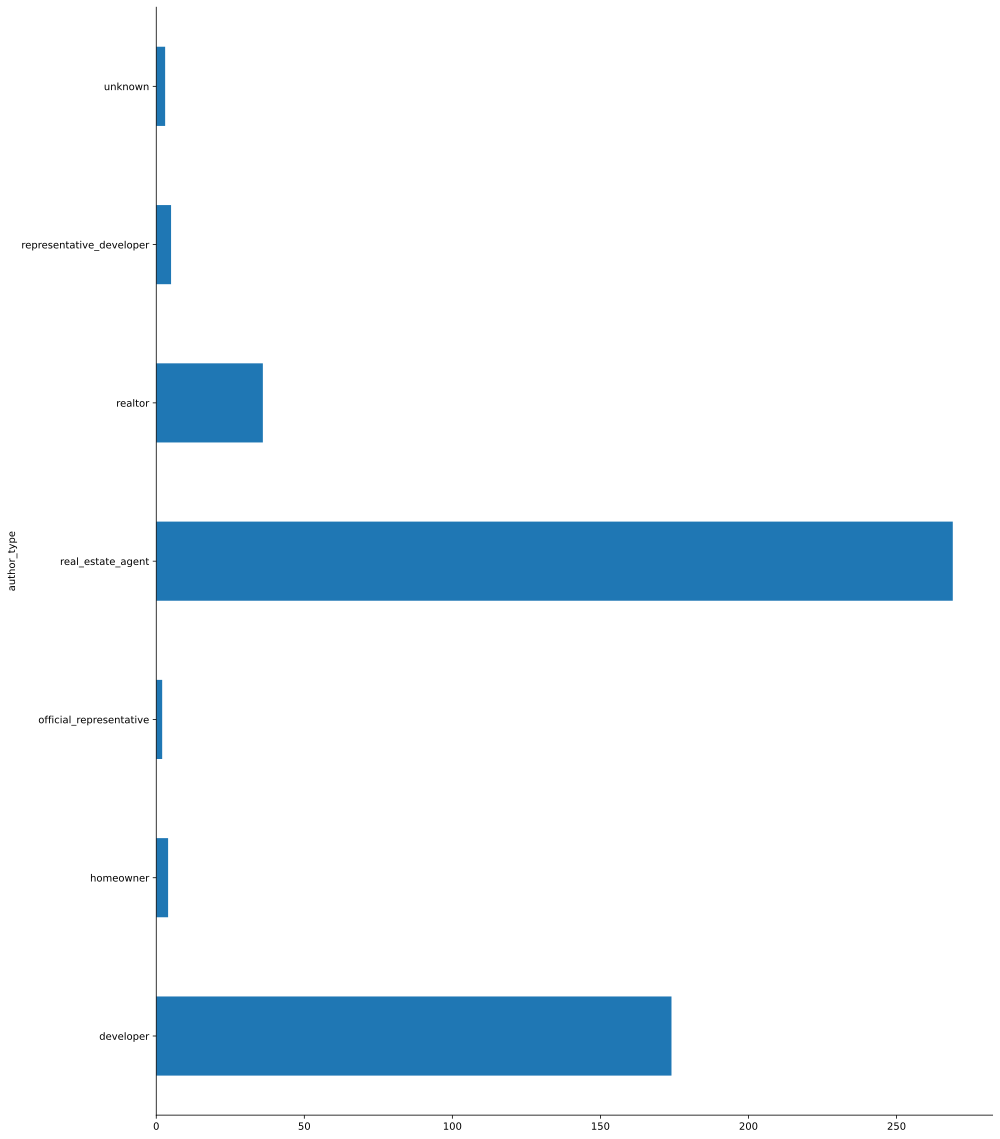

In [26]:
# @title author_type

from matplotlib import pyplot as plt
import seaborn as sns
dom.groupby('author_type').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#На графике видна группировка по типу продавцов и количественное отношение друг к другу: больше всего предложений от агентов
#Теперь построим свои графики

In [8]:
dom.shape

(494, 16)

In [9]:
dom.columns

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'district', 'street', 'house_number',
       'underground', 'residential_complex'],
      dtype='object')

In [10]:
dom.sample(5)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
32,SITRealty,real_estate_agent,https://www.cian.ru/sale/flat/303560811/,Москва,sale,flat,4,7,1,40.00,9650000,NaN,Медовая Долина,2,Санино,Баркли Медовая долина
75,MR Group,developer,https://www.cian.ru/sale/flat/302792260/,Москва,sale,flat,4,13,2,85.76,108088817,Мещанский,Садовая-Сухаревская,14,Цветной бульвар,Клубный дом Forum
394,Основа,developer,https://www.cian.ru/sale/flat/297432252/,Москва,sale,flat,4,31,2,46.05,21183000,Марфино,NaN,к1,Улица Милашенкова,Вери ЖК
456,Центр-Инвест,developer,https://www.cian.ru/sale/flat/298329420/,Москва,sale,flat,2,9,1,49.20,50910200,Таганский,Серебрянический переулок,6,Китай-город,Титул на Серебрянической
486,TOUCH,developer,https://www.cian.ru/sale/flat/302838431/,Москва,sale,flat,8,13,1,45.55,29049000,Южнопортовый,NaN,к2,Дубровка,Шампайн ЖК


In [ ]:
#Построим график, показывающий средний ценник за квартиру в зависимости от района в отсортированном виде

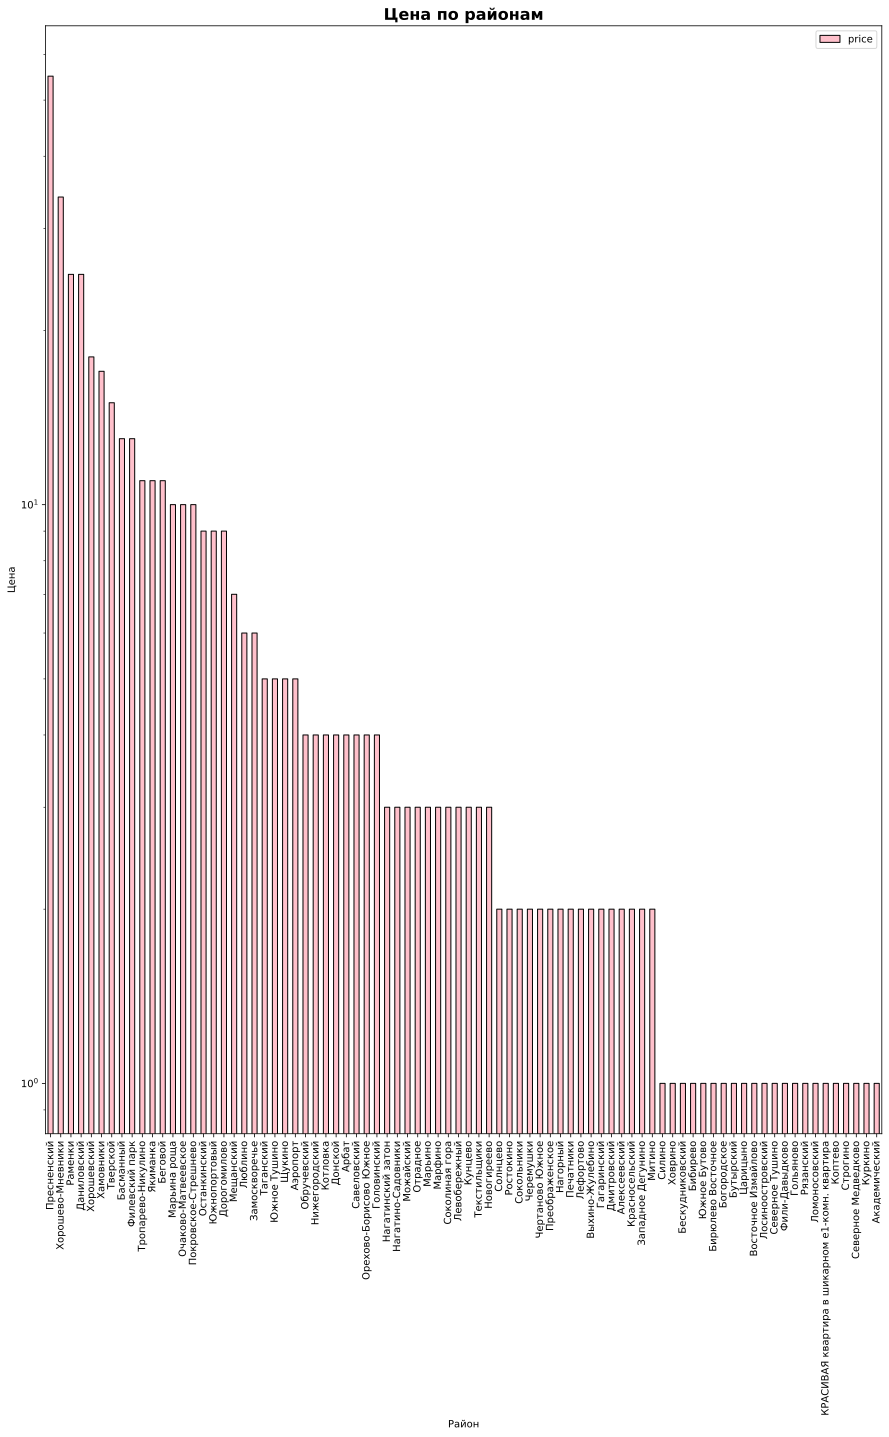

In [23]:
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 15,20
y=dom.groupby('district')['price'].size()

y.sort_values(ascending=False).plot(kind='bar', logy=True, ec='black', color='pink')
plt.title('Цена по районам', fontsize=16, fontweight='bold')
plt.xlabel('Район')
plt.ylabel('Цена')
plt.legend()

plt.show()

In [ ]:
#На графике увидим, что самые дорогие квартиры в районе Пресненский, а самые дешевые в районе Академический, Северное Медведково и пр (хотя насчет Академического района я бы усомнилась)

In [ ]:
#Построим 2 наш график, показывающий среднмий ценник у типов продавцов

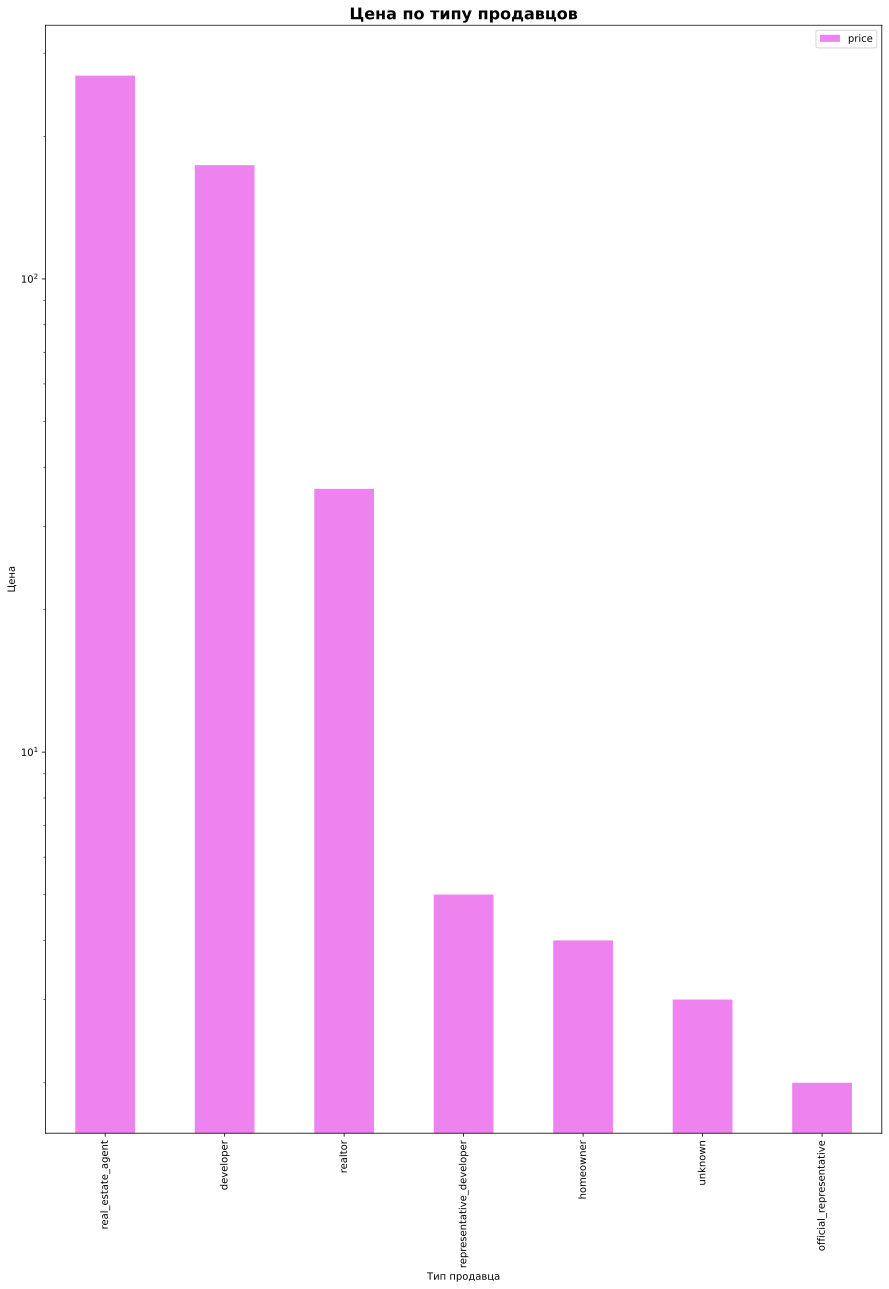

In [25]:
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 15,20
y=dom.groupby('author_type')['price'].size()

y.sort_values(ascending=False).plot(kind='bar', logy=True, color='violet')
plt.title('Цена по типу продавцов', fontsize=16, fontweight='bold')
plt.xlabel('Тип продавца')
plt.ylabel('Цена')
plt.legend()

plt.show()

In [ ]:
#На графике увидим, что агенты дороже всех выставляют объявления, а официальные представители дешевле всех (видимо, на стадии котлована)